In [70]:
import numpy as np
import os

from fenics import *
from dolfin import *
#from mshr import *
import matplotlib.pyplot as plt

comm = MPI.comm_world
rank = MPI.rank(comm)

data = HDF5File(comm, f"with_timederivative/data_test_count_49_w0_0.2828_K_5.0.h5", 'r')

In [71]:
mesh = Mesh()
data.read(mesh, "mesh", False)

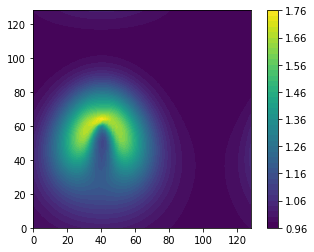

In [72]:
nx = 60
ny = 60
LX = 128 
LY = 128

# Sub domain for Periodic boundary condition
class PeriodicBoundary(SubDomain):

    def inside(self, x, on_boundary):
        return bool((near(x[0], 0) or near(x[1], 0)) and
                (not ((near(x[0], 0) and near(x[1], LY)) or
                        (near(x[0], LX) and near(x[1], 0)))) and on_boundary)

    def map(self, x, y):
        if near(x[0], LX) and near(x[1], LY):
            y[0] = x[0] - LX
            y[1] = x[1] - LY
        elif near(x[0], LX):
            y[0] = x[0] - LX
            y[1] = x[1]
        else:   # near(x[1], 127)
            y[0] = x[0]
            y[1] = x[1] - LY
            
V = VectorElement("Lagrange", mesh.ufl_cell(), 1, dim = 2)
Q = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
MFS = FunctionSpace(mesh, MixedElement([Q, V]), constrained_domain = PeriodicBoundary())

VFS = FunctionSpace(mesh, V, constrained_domain = PeriodicBoundary())

FS  = FunctionSpace(mesh, Q, constrained_domain = PeriodicBoundary())

u_new = Function(MFS) 
w = Function(FS)
(rho_new, tau_new) = split(u_new)

t = 222

data.read(u_new, f"u_new/Vector/vector_{t}")

c = plot(rho_new)
plt.colorbar(c)



In [73]:
import os

data_dir = f"{os.getcwd()}"
print(os.getcwd())

/Volumes/T7 Shield/polar


In [75]:
def plot_rho_w(file_name, x0, idx, w_pos, rho_pos, step):
    if not os.path.exists(f'{data_dir}/with_timederivative/rho_w'):
        os.makedirs(f'{data_dir}/with_timederivative/rho_w')
    data = HDF5File(comm, file_name, 'r') 
    v_old = Function(MFS)
    w = Function(FS)
    alpha = Function(FS)
    data.read(v_old, f"u_new/Vector/vector_{step*idx}")
    data.read(w, f"w/Vector/vector_{step*idx}")
    alpha.vector().set_local(w.vector()[:]*w.vector()[:])
    eta_old, nu_old = v_old.split()
    y = np.linspace(0, LY, LY)
    rho_y = [eta_old(x0, yi) for yi in y]
    w_y = [alpha(x0, yi) for yi in y]
    
    rho_pos.append(rho_y.index(max(rho_y)))
    w_pos.append(w_y.index(max(w_y)))
    fig, ax1 = plt.subplots(figsize = (9, 6))

    ax2 = ax1.twinx()
    ax1.plot(y, rho_y, 'g-')
    ax2.plot(y, w_y, 'b-')
    plt.axvline(x = 40, linestyle = '--', color = 'k')
    plt.axvline(x = 70, linestyle = '--', color = 'k')   
    plt.title(f"T = {step*idx}", fontsize = 18)
    ax1.set_xlabel('Y', fontsize = 20)
    ax1.set_ylabel(r'$\rho$', color='g', fontsize = 20)
    ax2.set_ylabel(r'$\omega$', color='b', fontsize = 20)
    
    # Increase tick label font size on both axes
    ax1.tick_params(axis='both', labelsize=20)
    ax2.tick_params(axis='both', labelsize=20)    
    plt.tight_layout()
#     if(idx > 3):
#         ax2.set_ylim([0.0, 1.75])
    plt.savefig(f"{data_dir}/with_timederivative/rho_w/rho_w_{idx}.png", dpi = 300)
    #plt.show()


In [ ]:
total_time = 2000
alpha = Function(FS)
w_pos = []
rho_pos = []

step = 4

count = 0
for i in range(0, total_time, step):
    print(f"step : {i}", flush = True)
    plot_rho_w("with_timederivative/data_test_count_49_w0_0.2828_K_5.0.h5", 40, count, w_pos, rho_pos, step)
    count = count + 1

step : 0
step : 4
step : 8
step : 12
step : 16
step : 20
step : 24
step : 28
step : 32
step : 36
step : 40
step : 44
step : 48
step : 52
step : 56
step : 60
step : 64
step : 68
step : 72
step : 76
step : 80


<ipython-input-75-998897e00b37>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize = (9, 6))


step : 84
step : 88
step : 92
step : 96
step : 100
step : 104
step : 108
step : 112
step : 116
step : 120
step : 124
step : 128
step : 132
step : 136
step : 140
step : 144
step : 148
step : 152
step : 156
step : 160
step : 164
step : 168
step : 172
step : 176
step : 180
step : 184
step : 188
step : 192
step : 196
step : 200
step : 204
step : 208
step : 212
step : 216
step : 220
step : 224
step : 228
step : 232
step : 236
step : 240
step : 244
step : 248
step : 252
step : 256
step : 260
step : 264
step : 268
step : 272
step : 276
step : 280
step : 284
step : 288
step : 292
step : 296
step : 300
step : 304
step : 308
step : 312
step : 316
step : 320
step : 324
step : 328
step : 332
step : 336
step : 340
step : 344
step : 348
step : 352
step : 356
step : 360
step : 364
step : 368
step : 372
step : 376
step : 380
step : 384
step : 388
step : 392
step : 396
step : 400
step : 404
step : 408
step : 412
step : 416
step : 420
step : 424
step : 428
step : 432
step : 436
step : 440
step : 444
ste

In [12]:
import os

data_dir = f"{os.getcwd()}"
print(os.getcwd())

/Volumes/T7 Shield/polar


In [66]:
np.savez(f"{data_dir}/with_timederivative/w_pos_rho_pos.npz", w_pos = w_pos, rho_pos = rho_pos)

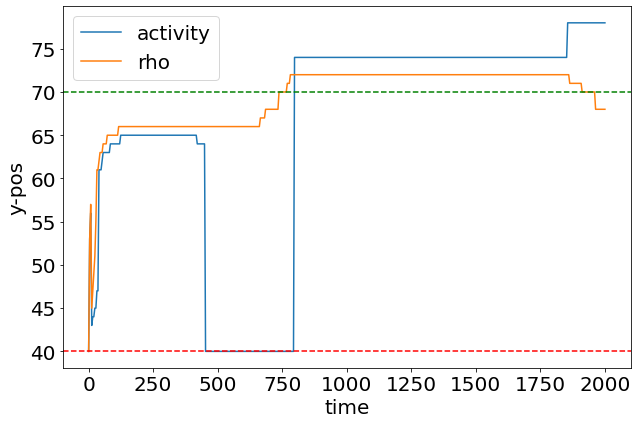

In [69]:
plt.figure(figsize = (9, 6))
time = np.linspace(0, 2000, len(w_pos))
plt.plot(time, w_pos, label = 'activity')
plt.plot(time, rho_pos, label = 'rho')
plt.axhline(y = 40, linestyle = '--', color = 'r')
plt.axhline(y = 70, linestyle = '--', color = 'g')
plt.xlabel("time", fontsize = 20)
plt.ylabel("y-pos", fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 20)
plt.tight_layout()

plt.savefig(f"{data_dir}/with_timederivative/position_activity_rho_max.png", dpi = 300)